In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import glob
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
file_list = glob.glob('/content/*.xlsx')
file=file_list[0]
data=pd.read_excel(file, engine='openpyxl', sheet_name='synt_features')

In [ ]:
data.head()

,Mean,STD,Modality,Skewness,Kurtosis,IQR,SNR,MaxI,SumI,hu,IsReal
0,5145.099160,1541.759915,7,-0.433094,0.021196,2210.9050,3.483767,11561.59,10537163.08,0.0,0
1,1827.069404,429.970421,9,-0.265501,0.504996,559.6525,4.365372,4124.24,3741838.14,0.0,0
2,4635.637593,1340.426444,6,-0.489028,-0.157850,1977.3525,3.600007,8960.98,9493785.79,0.0,0
3,4844.549116,1579.556066,8,-0.103722,-0.250600,2302.2125,3.225940,10749.81,9921636.59,0.0,0
4,1383.617173,315.142120,11,0.731249,4.167441,364.9325,4.502898,3858.28,2833647.97,0.0,0


In [ ]:
data.columns

Index(['Mean', 'STD', 'Modality', 'Skewness', 'Kurtosis', 'IQR', 'SNR', 'MaxI',
       'SumI', 'hu', 'IsReal'],
      dtype='object')

In [ ]:
len(data)

132

In [ ]:
data=data.dropna()

In [ ]:
len(data)

130

In [ ]:
X = data.drop(columns=['hu', 'IsReal'], axis=1)  # Features
X.columns = X.columns.astype(str)


In [ ]:
X_corr=X.corr().where(np.triu(np.ones(X.corr().shape), k=1).astype(bool))

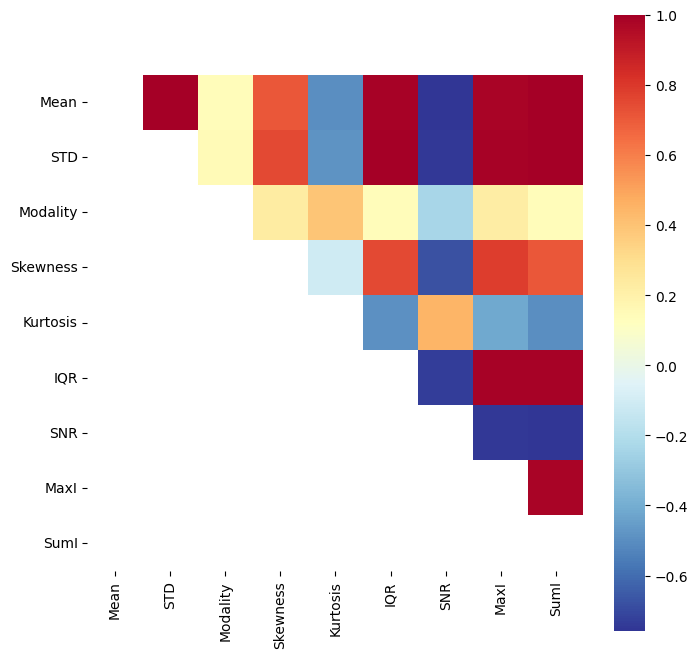

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(X_corr, cmap="RdYlBu_r", square=True);


In [ ]:
X_reduced = X

In [ ]:
threshold =0.8
# Get columns where correlation is greater than threshold
highly_correlated_features = []
for i in range(X.shape[1]):
    for j in range(X.shape[1]):
        #print('i=' + str(i))
        #print('j=' + str(j))
        if abs(X_corr.iloc[i, j]) > threshold:
            # Add only one feature per pair to avoid duplicates and ensure we drop only one feature per pair.
            if X.columns[j] not in highly_correlated_features:
                highly_correlated_features.append(X.columns[i])

# Drop these features from original DataFrame
X_reduced = X.drop(highly_correlated_features, axis=1)
#X_reduced=X_reduced.drop(columns='SNR2')
print("Features removed:", highly_correlated_features)
print("Remaining features:", list(X_reduced.columns))

Features removed: ['Mean', 'Mean', 'Mean', 'Mean', 'STD', 'STD', 'STD', 'IQR', 'IQR', 'MaxI']
Remaining features: ['Modality', 'Skewness', 'Kurtosis', 'SNR', 'SumI']


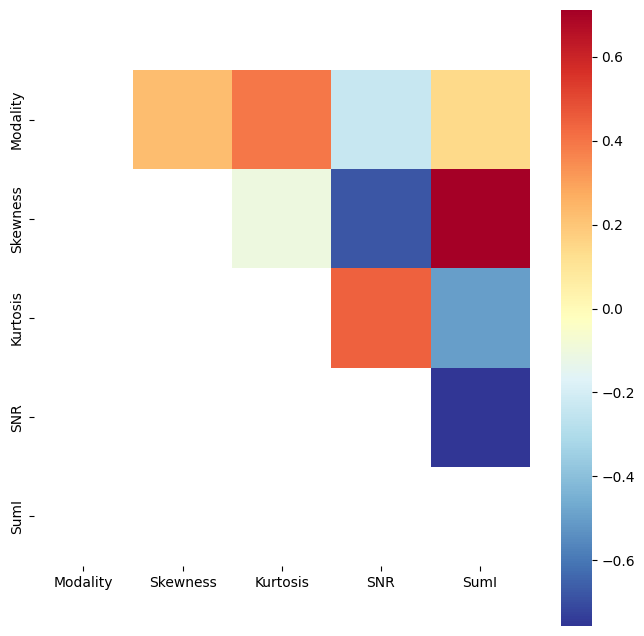

In [ ]:
X_new=X_reduced.copy()
X_corr_new=X_new.corr().where(np.triu(np.ones(X_new.corr().shape), k=1).astype(bool))
plt.figure(figsize=(8, 8))
sns.heatmap(X_corr_new, cmap="RdYlBu_r", square=True);

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced.dropna())
y_combined = data[['hu']]

In [ ]:
y_combined['isReal']=data['IsReal']

<ipython-input-93-a133dd20b0be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_combined['isReal']=data['IsReal']


In [ ]:
len(X_scaled)

130

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

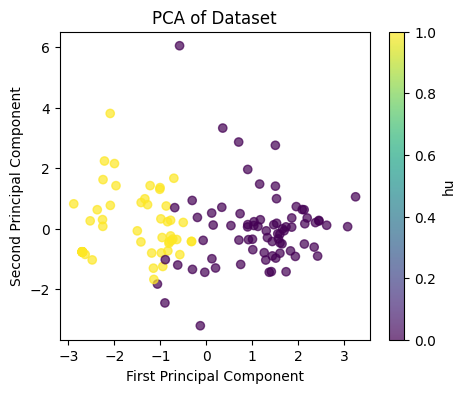

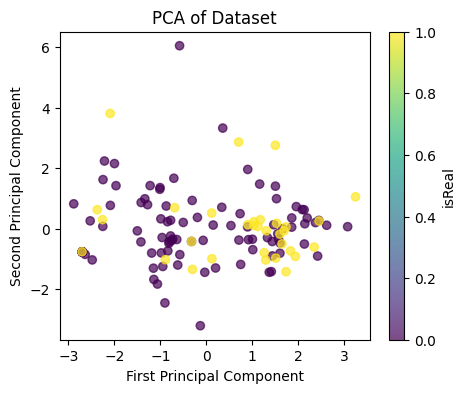

In [ ]:
from matplotlib.colors import ListedColormap
for column_name, column_data in y_combined.items():
    plt.figure(figsize=(5, 4))
    binary_data = np.where(column_data > 0, 1, 0)
    scatter = plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=binary_data,
        alpha=0.7,
    )
    cbar = plt.colorbar(scatter, label=column_name)
    plt.title('PCA of Dataset')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

In [ ]:
from matplotlib.colors import ListedColormap
for column_name, column_data in y_combined.items():
    plt.figure(figsize=(5, 4))
    binary_data = np.where(column_data > 0, 1, 0)

    # Separate indices for isReal == 0 and isReal == 1
    is_real = y_combined['isReal']
    idx_circle = is_real == 1
    idx_square = is_real == 0

    # Plot points where isReal == 1 as circles ('o')
    plt.scatter(
        X_pca[idx_circle, 0],
        X_pca[idx_circle, 1],
        c=binary_data[idx_circle],
        alpha=0.7,
        marker='o',
    )

    # Plot points where isReal == 0 as squares ('s')
    plt.scatter(
        X_pca[idx_square, 0],
        X_pca[idx_square, 1],
        c=binary_data[idx_square],
        alpha=0.7,
        marker='x',
    )

    cbar = plt.colorbar(label=column_name)
    plt.title('PCA of Dataset')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    plt.show()